In [30]:
# from config import API_key
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# import date

In [2]:
# Null Hypothesis
# Alternative Hypothesis

In [3]:
moon_stuff = pd.read_csv("Resources/history_data.csv")

moon_stuff["Date"] = pd.to_datetime(moon_stuff["Date time"])
moon_stuff.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,...,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Sunset,Sunrise,Moon Phase,Date
0,"Harrisburg, PA, United States",01/01/2015,40.9,17.8,31.4,12.7,NaN,0.01,NaN,NaN,...,229.83,25.5,9.9,1.5,45.12,Rain,2015-01-01T16:52:00-05:00,2015-01-01T07:30:16-05:00,0.41,2015-01-01
1,"Harrisburg, PA, United States",01/02/2015,43.0,26.3,34.6,26.8,NaN,0.00,NaN,NaN,...,195.58,34.4,9.9,7.6,52.17,Clear,2015-01-02T16:52:51-05:00,2015-01-02T07:30:22-05:00,0.45,2015-01-02
2,"Harrisburg, PA, United States",01/03/2015,35.8,22.1,30.7,22.2,NaN,0.57,NaN,NaN,...,73.17,NaN,5.0,73.0,86.17,"Rain, Partially cloudy",2015-01-03T16:53:43-05:00,2015-01-03T07:30:26-05:00,0.48,2015-01-03
3,"Harrisburg, PA, United States",01/04/2015,49.8,35.0,39.9,31.8,NaN,0.19,NaN,NaN,...,97.21,40.3,2.8,84.2,90.21,"Rain, Overcast",2015-01-04T16:54:36-05:00,2015-01-04T07:30:28-05:00,0.49,2015-01-04
4,"Harrisburg, PA, United States",01/05/2015,43.9,20.8,31.9,9.5,NaN,0.00,NaN,NaN,...,298.79,38.8,9.9,50.8,42.62,Partially cloudy,2015-01-05T16:55:31-05:00,2015-01-05T07:30:28-05:00,0.50,2015-01-05


In [4]:
emergency_csv = pd.read_csv("Resources/911.csv")

emergency_csv["Date"] = emergency_csv["timeStamp"].str.slice(0,10)
emergency_csv["Date"] = pd.to_datetime(emergency_csv["Date"])
emergency_csv.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10


In [5]:
merged_df = pd.merge(emergency_csv, moon_stuff, on = "Date", how = "left")
merged_df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,...,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Sunset,Sunrise,Moon Phase
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99


In [6]:
merged_df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Date', 'Name', 'Date time', 'Maximum Temperature',
       'Minimum Temperature', 'Temperature', 'Wind Chill', 'Heat Index',
       'Precipitation', 'Snow', 'Snow Depth', 'Wind Speed', 'Wind Direction',
       'Wind Gust', 'Visibility', 'Cloud Cover', 'Relative Humidity',
       'Conditions', 'Sunset', 'Sunrise', 'Moon Phase'],
      dtype='object')

In [7]:
werewolf_df = merged_df.loc[:,["lat", "lng", "zip", "title", "twp", "Date", "Moon Phase"]]
werewolf_df = werewolf_df.rename(columns = {
    "title": "Emergency Reason",
    "twp": "Town/City",
})
werewolf_df.head()
# group_moon = werewolf_df.groupby(["Moon Phase", "Emergency Reason"])
group_moon_phase = werewolf_df.groupby(["Moon Phase"])
group_moon_phase.count()

,lat,lng,zip,Emergency Reason,Town/City,Date
Moon Phase,,,,,,
0.00,16514,16514,14356,16514,16510,16514
0.01,14157,14157,12562,14157,14150,14157
0.02,10150,10150,8843,10150,10148,10150
0.03,7165,7165,6219,7165,7161,7165
0.04,6029,6029,5291,6029,6023,6029
...,...,...,...,...,...,...
0.96,7503,7503,6594,7503,7501,7503
0.97,6667,6667,5819,6667,6661,6667
0.98,8197,8197,7192,8197,8194,8197


In [8]:
werewolf_df.head()
# YVONNE
# split emergency reason from responder
# Type of responder and 

,lat,lng,zip,Emergency Reason,Town/City,Date,Moon Phase
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10,0.99
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10,0.99
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10,0.99
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10,0.99
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10,0.99


In [9]:
merged_df.to_csv("Resources/merged_data.csv", index = False)

In [10]:
werewolf_df.to_csv("Resources/werewolf_data.csv", index = False)


In [20]:
emergency_reason = werewolf_df["Emergency Reason"]
responder = emergency_reason.str.split(pat=":", n=- 1, expand=True)
werewolf_df["Responder"] = responder[0]
werewolf_df["Emergency Reason"] = responder[1]

werewolf_df = werewolf_df[["lat", "lng", "zip", "Emergency Reason", "Responder", "Town/City", "Date", "Moon Phase"]]
werewolf_df

,lat,lng,zip,Emergency Reason,Responder,Town/City,Date,Moon Phase
0,40.297876,-75.581294,19525.0,BACK PAINS/INJURY,EMS,NEW HANOVER,2015-12-10,0.99
1,40.258061,-75.264680,19446.0,DIABETIC EMERGENCY,EMS,HATFIELD TOWNSHIP,2015-12-10,0.99
2,40.121182,-75.351975,19401.0,GAS-ODOR/LEAK,Fire,NORRISTOWN,2015-12-10,0.99
3,40.116153,-75.343513,19401.0,CARDIAC EMERGENCY,EMS,NORRISTOWN,2015-12-10,0.99
4,40.251492,-75.603350,NaN,DIZZINESS,EMS,LOWER POTTSGROVE,2015-12-10,0.99
...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,19403.0,VEHICLE ACCIDENT -,Traffic,EAST NORRITON,2020-07-29,NaN
663518,40.136306,-75.428697,19403.0,GENERAL WEAKNESS,EMS,LOWER PROVIDENCE,2020-07-29,NaN
663519,40.013779,-75.300835,19041.0,VEHICLE ACCIDENT,EMS,LOWER MERION,2020-07-29,NaN
663520,40.121603,-75.351437,19401.0,BUILDING FIRE,Fire,NORRISTOWN,2020-07-29,NaN


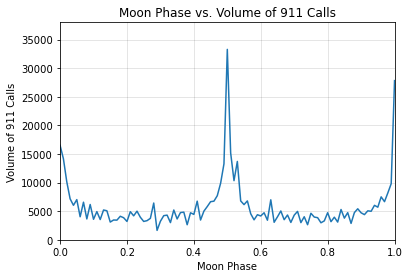

In [11]:
# YVONNE

emergency_count = group_moon_phase["Emergency Reason"].count()
moon_line = emergency_count.plot(kind = "line", title = "Moon Phase vs. Volume of 911 Calls", xlabel = "Moon Phase", ylabel = "Volume of 911 Calls")
moon_line.set_xlim(0,1.001)
moon_line.set_ylim(0,38000)
plt.grid(color='black', linewidth=1, alpha = 0.1)
moon_line
plt.savefig("Images/MoonPhase_vs_EmergencyReasonCount_Yvonne.png")

In [13]:
# ALEX
bins = [0,0.2,0.4,0.6,0.8,1]
group_names = ["New Moon End", "Waxing", "Full Moon Area", "Waning", "New Moon Begin"]
werewolf_df["Phasing"] = pd.cut(werewolf_df["Moon Phase"], bins, labels=group_names, include_lowest=True)
werewolf_df

,lat,lng,zip,Emergency Reason,Town/City,Date,Moon Phase,Phasing
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10,0.99,New Moon Begin
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10,0.99,New Moon Begin
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10,0.99,New Moon Begin
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10,0.99,New Moon Begin
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10,0.99,New Moon Begin
...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,19403.0,Traffic: VEHICLE ACCIDENT -,EAST NORRITON,2020-07-29,NaN,NaN
663518,40.136306,-75.428697,19403.0,EMS: GENERAL WEAKNESS,LOWER PROVIDENCE,2020-07-29,NaN,NaN
663519,40.013779,-75.300835,19041.0,EMS: VEHICLE ACCIDENT,LOWER MERION,2020-07-29,NaN,NaN
663520,40.121603,-75.351437,19401.0,Fire: BUILDING FIRE,NORRISTOWN,2020-07-29,NaN,NaN


In [14]:
# filtered_df = werewolf_df.loc[(werewolf_df["Phasing"]== "New Moon Begin")|(werewolf_df["Phasing"]== "Waxing")|(werewolf_df["Phasing"]== "Full Moon Area")|(werewolf_df["Phasing"]== "Waning")|(werewolf_df["Phasing"]== "New Moon End")]
filtered_df = werewolf_df.dropna()

group_moon_phasing = filtered_df.groupby(["Phasing", "Date"])
group_moon_phasing.head()
group_counted = group_moon_phasing["Emergency Reason"].count()
group_counted.head()


group_counted_df = pd.DataFrame(group_counted)
group_counted_df.reset_index(inplace=True)
group_counted_df.head()

clean_counted_df = group_counted_df.loc[group_counted_df["Emergency Reason"]!= 0,:]
group_counted_df
clean_counted_df["Phasing"].value_counts()

Full Moon Area    432
New Moon Begin    320
New Moon End      318
Waning            204
Waxing            203
Name: Phasing, dtype: int64

In [27]:
narrowed_phases = werewolf_df.loc[(werewolf_df["Moon Phase"]== 0.0)|(werewolf_df["Moon Phase"]== 0.25)|(werewolf_df["Moon Phase"]== 0.5)|(werewolf_df["Moon Phase"]== 0.75),:]

narrowed_phases["Moon Phase"].value_counts()

0.50    33278
0.00    16514
0.75     4636
0.25     3208
Name: Moon Phase, dtype: int64

In [28]:
group_moon_date = narrowed_phases.groupby(["Moon Phase"])
group_counted = group_moon_date["Emergency Reason"].count()
group_counted.head()


group_counted_df = pd.DataFrame(group_counted)
group_counted_df.reset_index(inplace=True)
group_counted_df.head(20)

,Moon Phase,Emergency Reason
0,0.00,16514
1,0.25,3208
2,0.50,33278
3,0.75,4636


In [31]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

In [ ]:
group_counted_df["Emergency Reason"].sum()
average = 57636/4
group_counted_df["expected"] = average
group_counted_df

In [ ]:
stats.chisquare(group_counted_df['Emergency Reason'], group_counted_df["expected"])

In [ ]:
fig, ax = plt.subplots()
y_values = group_counted_df["Emergency Reason"]
labels = ["New Moon", "First Quarter", "Full Moon","Last Quarter"]
plt.bar(labels, y_values, color="mediumseagreen", align="center")
plt.title("911 Calls per Moon Phase (2015-2019)")
plt.xlabel("Moon Phase")
plt.ylabel("911 Calls")
plt.grid()
ax.set_axisbelow(True)
plt.savefig('Images/Calls_per_phase_Alex.png')
plt.show()


In [ ]:
filtered_df = werewolf_df.dropna()

group_moon_phasing = filtered_df.groupby("Phasing")
group_moon_phasing.head()
group_counted = group_moon_phasing["Emergency Reason"].count()
group_counted.head()


group_counted_df = pd.DataFrame(group_counted)
group_counted_df.reset_index(inplace=True)
# group_counted_df.head()

clean_counted_df = group_counted_df.loc[group_counted_df["Emergency Reason"]!= 0,:]
group_counted_df
clean_counted_df

In [ ]:
expected = clean_counted_df["Emergency Reason"].sum()/5
clean_counted_df["expected"] = expected

In [ ]:
critical_value = stats.chi2.ppf(q = 0.95, df = 4)

In [ ]:
stats.chisquare(clean_counted_df['Emergency Reason'], clean_counted_df["expected"])

In [ ]:
fig, ax = plt.subplots()
y_values = clean_counted_df["Emergency Reason"]
labels = clean_counted_df["Phasing"]
plt.bar(labels, y_values, color="darkcyan", align="center", )
plt.title("911 Calls per Date Range (2015-2019)")
plt.xlabel("Moon Phases")
plt.ylabel("911 Calls")
plt.grid()
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()
plt.savefig('Images/Calls_per_daterange_Alex.png')

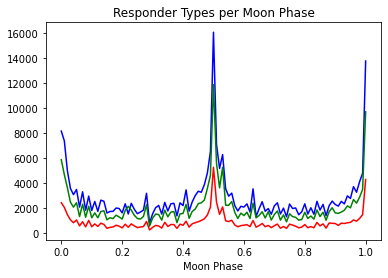

In [25]:
# TALHA
EMS_line= werewolf_df.loc[werewolf_df["Responder"]=="EMS"]
EMS_line=EMS_line.groupby("Moon Phase")
EMS_line=EMS_line["Emergency Reason"].count().plot(kind="line", color="b")


Fire_line= werewolf_df.loc[werewolf_df["Responder"]=="Fire"]
Fire_line=Fire_line.groupby("Moon Phase")
Fire_line=Fire_line["Emergency Reason"].count().plot(kind="line", color="r")

Traffic_line= werewolf_df.loc[werewolf_df["Responder"]=="Traffic"]
Traffic_line=Traffic_line.groupby("Moon Phase")
Traffic_line=Traffic_line["Emergency Reason"].count().plot(kind="line", color="g")

plt.title ("Responder Types per Moon Phase")
plt.savefig ("ResponderType_MoonPhase_Talha.png")

In [32]:
# JINGOU

Newmoon = werewolf_df.loc[werewolf_df["Moon Phase"]==0, ['lat','lng','zip','Emergency Reason','Responder','Town/City','Date','Moon Phase']]
# Newmoon["Emergency Reason"].value_counts().head(10)
# Newmoon["Emergency Reason"] = Newmoon["Emergency Reason"].replace({'VEHICLE ACCIDENT -':'VEHICLE ACCIDENT', 
#                                                                    'DISABLED VEHICLE -':'DISABLED VEHICLE', 
#                                                                    'ROAD OBSTRUCTION -':'ROAD OBSTRUCTION'})
Newmoon["Emergency Reason"] = Newmoon["Emergency Reason"].str.replace('DISABLED VEHICLE -','DISABLED VEHICLE')
Newmoon["Emergency Reason"] = Newmoon["Emergency Reason"].str.replace('VEHICLE ACCIDENT -','VEHICLE ACCIDENT')
Newmoon["Emergency Reason"] = Newmoon["Emergency Reason"].str.replace('ROAD OBSTRUCTION -','ROAD OBSTRUCTION')
Newmoon["Emergency Reason"].value_counts()


 VEHICLE ACCIDENT         4934
 DISABLED VEHICLE         1073
 FIRE ALARM                945
 FALL VICTIM               868
 RESPIRATORY EMERGENCY     839
                          ... 
 STABBING                    2
 TRANSFERRED CALL            2
 RESCUE - TECHNICAL          2
 AMPUTATION                  1
 INDUSTRIAL ACCIDENT         1
Name: Emergency Reason, Length: 70, dtype: int64

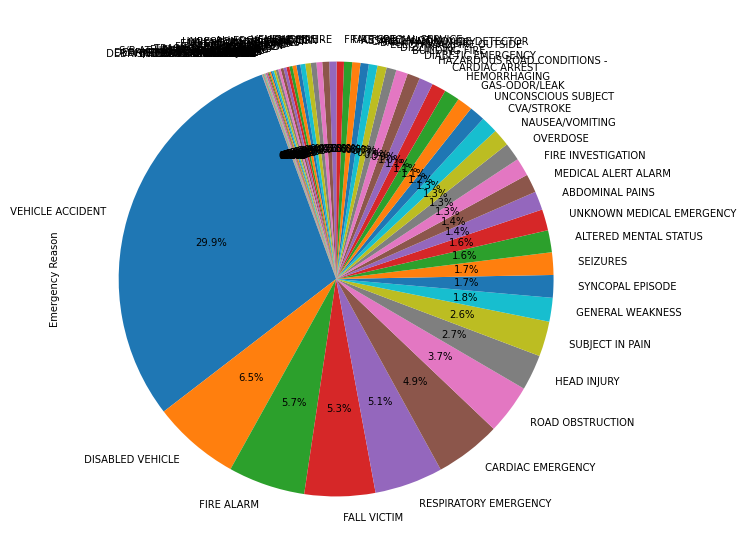

In [33]:
Newmoon['Emergency Reason'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, figsize=(18,10))
plt.savefig("Images/Newmoon_Jingou.png")

In [34]:
Fullmoon = werewolf_df.loc[werewolf_df["Moon Phase"]==0.5,['lat','lng','zip','Emergency Reason','Responder','Town/City','Date','Moon Phase']]
# Fullmoon["Emergency Reason"].value_counts().head()

Fullmoon["Emergency Reason"] = Fullmoon["Emergency Reason"].str.replace('DISABLED VEHICLE -','DISABLED VEHICLE')
Fullmoon["Emergency Reason"] = Fullmoon["Emergency Reason"].str.replace('VEHICLE ACCIDENT -','VEHICLE ACCIDENT')
Fullmoon["Emergency Reason"] = Fullmoon["Emergency Reason"].str.replace('EMERGENCY VEHICLE','VEHICLE ACCIDENT')
Fullmoon["Emergency Reason"] = Fullmoon["Emergency Reason"].str.replace('ROAD OBSTRUCTION -','ROAD OBSTRUCTION')

Fullmoon["Emergency Reason"].value_counts()

 VEHICLE ACCIDENT         9203
 DISABLED VEHICLE         2458
 FIRE ALARM               1976
 CARDIAC EMERGENCY        1679
 RESPIRATORY EMERGENCY    1626
                          ... 
 POLICE INFORMATION          2
 PUMP DETAIL                 2
 ELECTROCUTION               1
 DROWNING                    1
 PUBLIC SERVICE              1
Name: Emergency Reason, Length: 75, dtype: int64

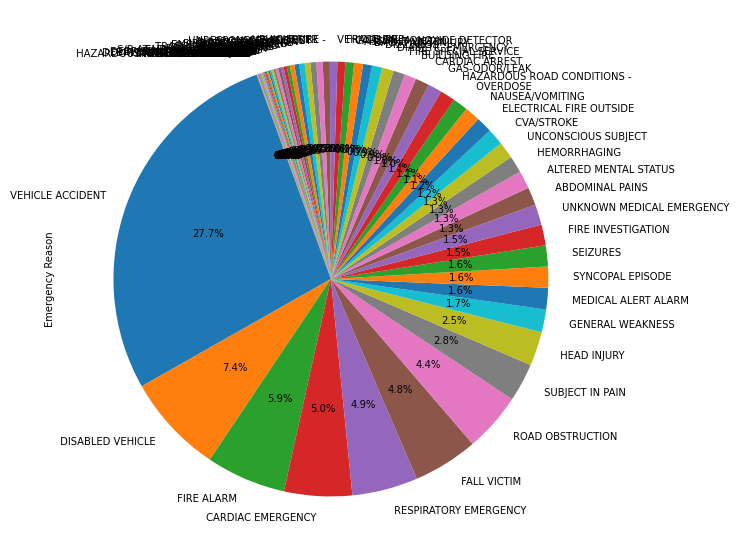

In [35]:
Fullmoon['Emergency Reason'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, figsize=(18,10))
plt.savefig("Images/Fullmoon_Jingou.png")

In [36]:
# YVONNE

werewolf_df["Year"] = pd.DatetimeIndex(werewolf_df.loc[:,"Date"]).year
werewolf_df["Year"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Year, dtype: int64

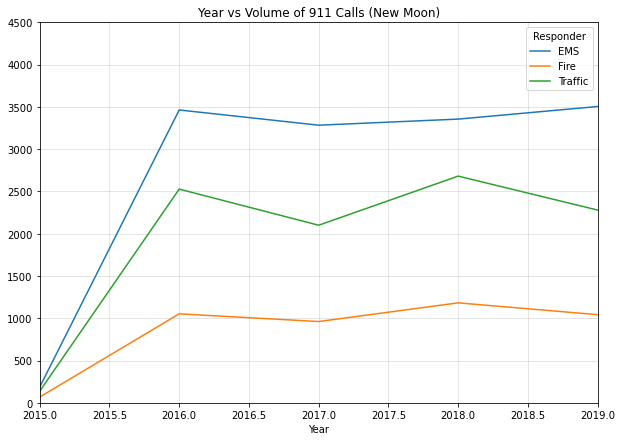

In [40]:
new_moon = werewolf_df.loc[werewolf_df['Moon Phase']==0 | 1]


fig, ax = plt.subplots(figsize=(10,7))
new_moon_line = new_moon.groupby(['Year','Responder']).count()['Moon Phase'].unstack().plot(ax=ax)

new_moon_line.set_xlim(2015, 2019)
new_moon_line.set_ylim(0,4500)
plt.title("Year vs Volume of 911 Calls (New Moon)")
plt.grid(color='black', linewidth=1, alpha = 0.1)
plt.savefig("Images/Years_911_NewMoon_Yvonne")

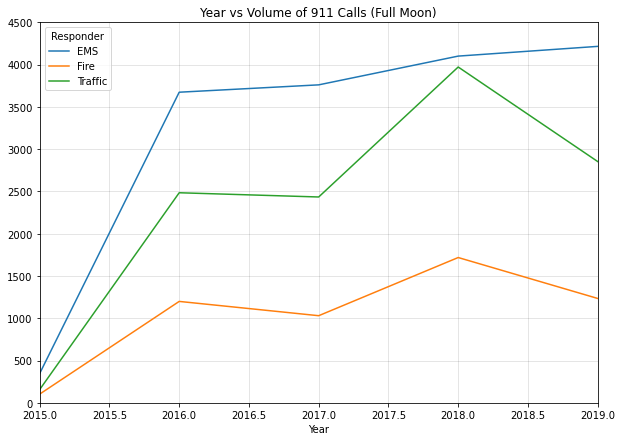

In [41]:
full_moon = werewolf_df.loc[werewolf_df['Moon Phase']==0.5]
fig, ax = plt.subplots(figsize=(10,7))
full_moon_line = full_moon.groupby(['Year', 'Responder']).count()['Moon Phase'].unstack().plot(ax=ax)

plt.title("Year vs Volume of 911 Calls (Full Moon)")
full_moon_line.set_xlim(2015, 2019)
full_moon_line.set_ylim(0,4500)
plt.grid(color='black', linewidth=1, alpha = 0.1)
plt.savefig("Images/Years_911_FullMoon_Yvonne")